In [112]:
from scraperModule.core import CmcScraper
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
pd.set_option('display.max_columns', None)

In [113]:
print('Pandas: ' + pd.__version__ + ' Numpy: ' + np.__version__ + ' Seaborn: ' + sns.__version__)

Pandas: 1.2.4 Numpy: 1.20.3 Seaborn: 0.11.1


In [105]:
coins_list = ['DOGE', 'BNB', 'BTC', 'ETH', 'LTC', 'DGB', 'ADA', 'MATIC']
start_date = "01-01-2018"
end_date = "10-06-2021"

In [106]:
df = pd.DataFrame()
for i in coins_list:
    # initialise scraper with time interval
    scraper = CmcScraper("INR", i, start_date, end_date)

    # get data in a json format
    json_data = scraper.get_dataframe()
    
    json_data.loc[:,'index'] = i
    
    df = pd.concat([df, json_data], axis = 0)
    
df.set_index('index', inplace = True)
df["Year"] = df.Date.dt.year
df["Month"] = df.Date.dt.month
df["Day"] = df.Date.dt.day
df.drop(["Date"], axis = 1, inplace = True)

INR DOGE 01-01-2018 10-06-2021
INR BNB 01-01-2018 10-06-2021
INR BTC 01-01-2018 10-06-2021
INR ETH 01-01-2018 10-06-2021
INR LTC 01-01-2018 10-06-2021
INR DGB 01-01-2018 10-06-2021
INR ADA 01-01-2018 10-06-2021
INR MATIC 01-01-2018 10-06-2021


In [107]:
indices = np.unique(df[['Year', 'Month']].reset_index().set_index(['Year', 'Month']).index)
dateblock_dic = {}
for i, j in enumerate(indices):
    dateblock_dic[j] = i + 1
df['DateBlock'] = df.apply(lambda x : dateblock_dic[(x.Year, x.Month)], axis = 1)

In [108]:
max_grouped = df.groupby(['index', 'DateBlock']).max()

<AxesSubplot:xlabel='DateBlock', ylabel='High'>

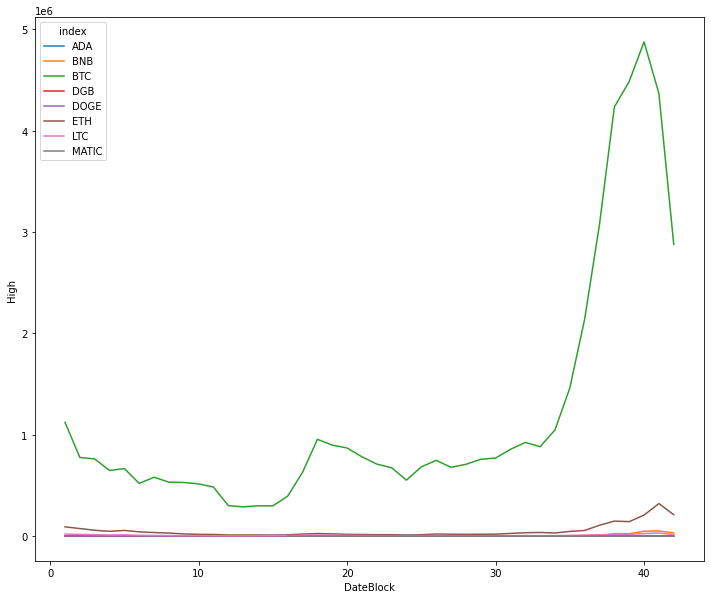

In [109]:
fig, ax = plt.subplots(figsize = (12, 10))
sns.lineplot(x='DateBlock', ax = ax, hue = 'index', y = 'High', data = max_grouped.reset_index())